# **Simple Linear Regression (SLR)** 



Today we are learning our **first machine learning algorithm – Simple Linear Regression (SLR)**.

This is a type of **supervised learning algorithm**, and it belongs to the **regression category** of ML tasks.

In machine learning, there are mainly three types of problems:
1. **Regression** – when we predict continuous values (like salary, house price)
2. **Classification** – when we predict categories (like spam or not spam)
3. **Clustering** – when we group data based on similarity without labeled output

Since **SLR predicts continuous values**, it is a **regression algorithm**.

### Note -
* We will use **Spyder** to build and run our machine learning model, as it provides a powerful IDE for writing and testing Python scripts efficiently.  
* For **documentation, explanations, and visual presentation**, we use **Jupyter Notebook** to keep everything well-organized and easy to understand.

In this notebook, we will:
- Understand the theory behind Simple Linear Regression
- Learn the formula `Y = mX + c` and how each part works
- Train a regression model using `scikit-learn` in Python
- Visualize the model and make predictions for new data points


## **Introduction to Regression**

Regression is a statistical method used to model the relationship between a dependent (target) variable and one or more independent (input) variables.

Purpose:
- Predict future outcomes based on past data.
- Understand how changes in the input affect the output.


## **What is Simple Linear Regression?**

Simple Linear Regression is a regression technique with:
- One independent variable (X)
- One dependent variable (Y)
- A linear (straight-line) relationship between them


Formula:
   \\[
    Y = mX + c
    \\]

Where:
- \\( Y \\): Predicted value (e.g., Salary)
- \\( X \\): Input variable (e.g., Years of Experience)
- \\( m \\): Slope (change in Y for each unit of X)
- \\( c \\): Intercept (value of Y when X = 0)



## **Understanding the Variables:**
- **X**: Independent variable (e.g., years of experience). This is the input feature.
- **Y**: Dependent variable (e.g., salary). This is the output we are trying to predict.
- **\\( \hat{Y} \\) (Y hat)**: Predicted value of Y using our regression equation.


## How to Calculate Slope (m) and Intercept (c)
To calculate the regression line manually:

Step 1: Find the mean of X (\\(\bar{X}\\)) and mean of Y (\\(\bar{Y}\\))

Step 2: Use the formulas:

- **Slope (m):**
\\[
    m = \frac{\sum{(X - \bar{X})(Y - \bar{Y})}}{\sum{(X - \bar{X})^2}}
\\]

- **Intercept (c):**
\\[
    c = \bar{Y} - m \cdot \bar{X}
\\]


**Simple Example:**

Let's say:
- X = \\[1, 2, 3, 4, 5\\]
- Y = \\[2, 4, 5, 4, 5\\]

Then:
- \\(\bar{X} = 3\\), \\(\bar{Y} = 4\\)
- Numerator = (X - \\(\bar{X}\\)) * (Y - \\(\bar{Y}\\)) = \\[4, 0, 0, 0, 2\\] →  Sum = 6
- Denominator = (X - \\(\bar{X}\\))^2 = \\[4, 1, 0, 1, 4\\] →  Sum = 10

So:
- m = 6 / 10 = 0.6
- c = 4 - (0.6 * 3) = 2.2

The final equation becomes:
\\[
    Y = 0.6X + 2.2
\\]
This line can now be used to predict future Y values based on X.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# 1. Load dataset

In [ ]:
# Load dataset
df = pd.read_csv(r"C:\Users\shali\Desktop\Nit Data Science\6_Month_DS_Road_Map_2025\8. Machine Learning\Regression\Salary_Prediction_App\Salary_Data.csv")

# Check columns
print(df.columns)

Index(['YearsExperience', 'Salary'], dtype='object')


In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


# 2. Separate features and target

In [5]:
# Separate features and target
x = df.iloc[:, :-1]  # Input variable (Years of Experience)
y = df.iloc[:, -1]   # Target variable (Salary)

In [8]:
# Check for missing values
print(df.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


# 3. Split into training and testing sets

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [13]:
df.shape

(30, 2)

In [10]:
# Number of rows (samples) in training set
print("Number of training samples (x_train):", len(x_train))
print("Number of training labels (y_train):", len(y_train))

Number of training samples (x_train): 24
Number of training labels (y_train): 24


In [11]:
# Number of rows (samples) in testing set
print("Number of test samples (x_test):", len(x_test))
print("Number of test labels (y_test):", len(y_test))

Number of test samples (x_test): 6
Number of test labels (y_test): 6


# 4. Import and train the model

In [14]:
from sklearn.linear_model import LinearRegression
# We create the linear regression model
regressor = LinearRegression()
# We fit the model using the training data
regressor.fit(x_train, y_train)

LinearRegression()

# 5. Predict test set

In [17]:
# Using the trained model to make predictions on test data
y_pred = regressor.predict(x_test)
print(y_pred)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


# 6. Compare actual vs predicted

In [18]:
# Creating a DataFrame to compare actual and predicted salaries
comparison = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
print(comparison)

    Actual        Predict
2    37731   40748.961841
28  122391  122699.622956
13   57081   64961.657170
10   63218   63099.142145
26  116969  115249.562855
24  109431  107799.502753


# 7. Visualize the results

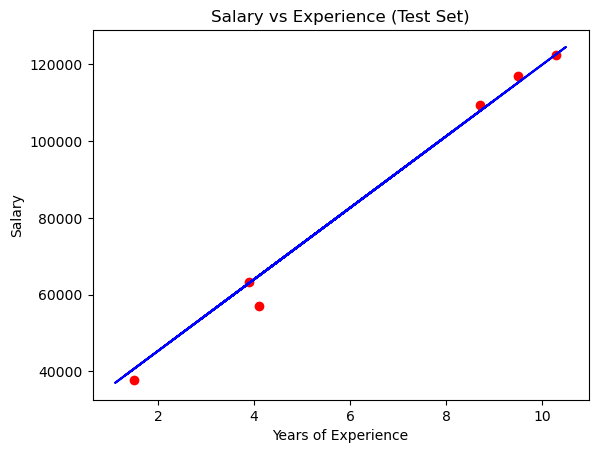

In [19]:
# Red points are actual test data, blue line is the regression prediction
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title("Salary vs Experience (Test Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

# 8. Calculate Slope (m) and Intercept (c)

In [20]:
# Get the slope (m) of the regression line
m_slope = regressor.coef_
print("Slope:", m_slope)

Slope: [9312.57512673]


In [21]:
# Get the intercept (c) of the regression line
c_intercept = regressor.intercept_
print("Intercept:", c_intercept)

Intercept: 26780.099150628186


# 9. Predict salary on unseen data
Let's Predict for 12 and 20 years of experience


In [23]:
# Using the formula: Y = mX + c
y_12 = (m_slope * 12) + c_intercept
print("Predicted Salary for 12 Years of Experience:", y_12)

Predicted Salary for 12 Years of Experience: [138531.00067138]


In [24]:
# Predict for 20 years
y_20 = (m_slope * 20) + c_intercept
print("Predicted Salary for 20 Years of Experience:", y_20)

Predicted Salary for 20 Years of Experience: [213031.60168521]


# 10. Summary – What We Did Today

- We learned what regression is and where Simple Linear Regression fits in the ML world.
- We studied the formula `Y = mX + c` and understood the roles of slope (m), intercept (c), input (X), and prediction (Y).
- We explored how to calculate slope and intercept manually with a simple example.
- Then we used Python and `scikit-learn` to:
  - Load a dataset
  - Train a linear regression model
  - Make predictions on test data
  - Visualize actual vs predicted values
  - Predict salaries for 12 and 20 years of experience

This was our first hands-on ML project using real data. With this foundation, we are now ready to explore more complex models and datasets.


### Note -

* We used **Spyder** to build and run our machine learning model, as it provides a powerful IDE for writing and testing Python scripts efficiently.  
* For **documentation, explanations, and visual presentation**, we used **Jupyter Notebook** to keep everything well-organized and easy to understand.